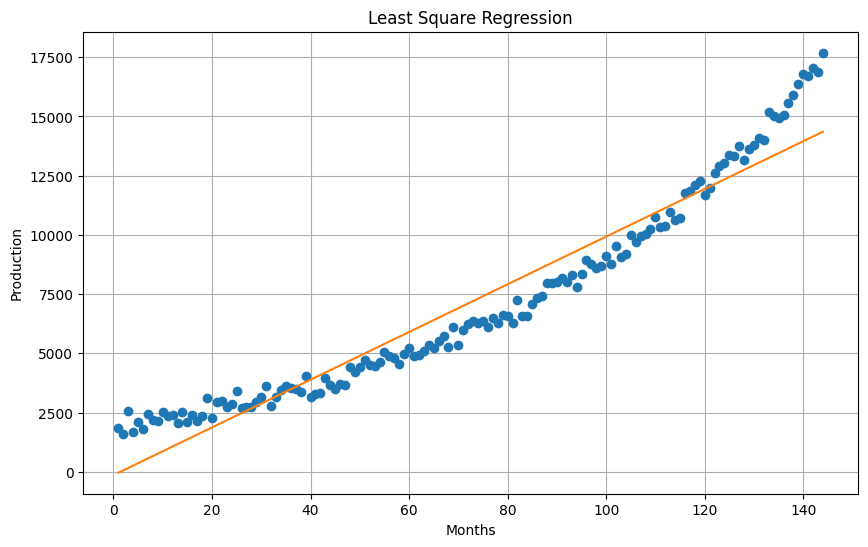

In [109]:
#No 1 (Trend)
import matplotlib.pyplot as plt
import numpy as np

production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277,
    2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 
    3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 
    6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 
    8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 
    15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689
]

months_num = np.arange(1, len(production_data) + 1)

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(months_num, production_data, 'o')
plt.title("Least Square Regression")
plt.xlabel("Months")
plt.ylabel("Production")

#Pseudo Inverse
A = np.vstack((months_num, np.ones(len(months_num)))).T
pseudo = np.linalg.pinv(A)
beta = pseudo.dot(production_data)

#Regression Line
plt.plot(months_num, beta[0] * months_num + beta[1], '-')

plt.show()



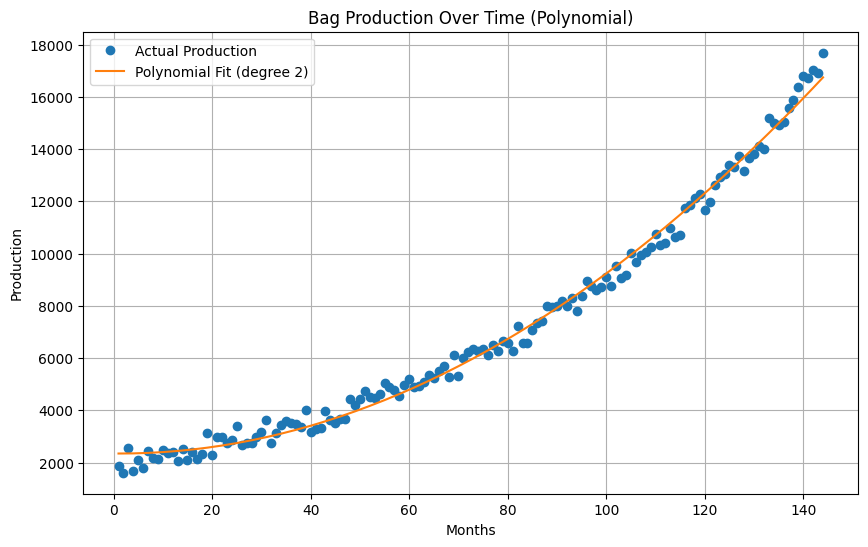

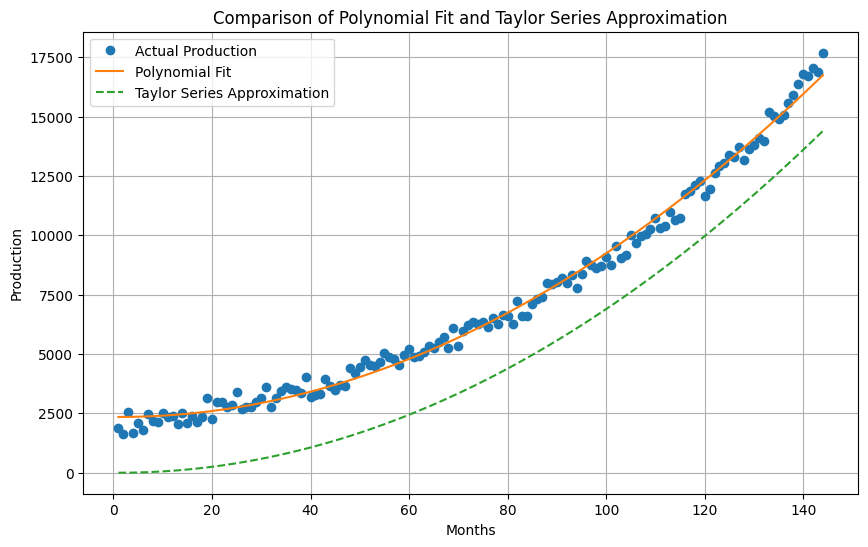

In [110]:
# No 2 ()
coeffs = np.polyfit(months_num, production_data, 2)
poly = np.poly1d(coeffs)

production_pred = poly(months_num)


plt.figure(figsize=(10,6))
plt.plot(months_num, production_data, 'o', label='Actual Production')
plt.plot(months_num, production_pred, '-', label='Polynomial Fit (degree 2)')
plt.xlabel('Months')
plt.ylabel('Production')
plt.title('Bag Production Over Time (Polynomial)')
plt.legend()
plt.grid(True)
plt.show()

#Approximate Taylor with polynomial
f_taylor = lambda x: coeffs[0] * x**2 + coeffs[1] * x + coeffs[0]

#Compare the polynomial and Taylor approximation
production_taylor_pred = f_taylor(months_num)


plt.figure(figsize=(10, 6))
plt.plot(months_num, production_data, 'o', label='Actual Production')
plt.plot(months_num, production_pred, '-', label='Polynomial Fit')
plt.plot(months_num, production_taylor_pred,'--', label='Taylor Series Approximation')
plt.xlabel('Months')
plt.ylabel('Production')
plt.title('Comparison of Polynomial Fit and Taylor Series Approximation')
plt.legend()
plt.grid(True)
plt.show()

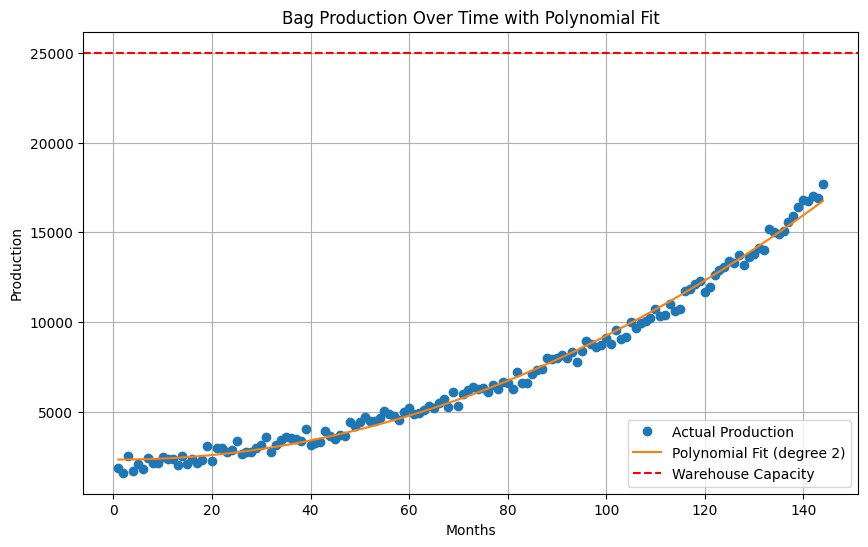

In [111]:
#No 3
def f(x): #polinomial Funtion
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2] - 25000 

def g(x): #Derivative
    return 2 * coeffs[0] * x + coeffs[1]


plt.figure(figsize=(10, 6))
plt.plot(months_num, production_data, 'o', label='Actual Production')
plt.plot(months_num, poly(months_num), '-', label='Polynomial Fit (degree 2)')
plt.axhline(y=25000, linestyle='--', color='r', label='Warehouse Capacity')
plt.xlabel('Months')
plt.ylabel('Production')
plt.title('Bag Production Over Time with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
#Newton-Raphson method
iter2 = 0

def newtonRaphson(x0, tolerance=0.01):
    global iter2
    iter2 += 1
    x1 = x0 - f(x0) / g(x0)

    if np.abs(f(x1)) < tolerance:
        print("Root found at: {:.3f}".format(x1))
        return x1
    
    print(f'Iteration {iter2}: {x1}')

    return newtonRaphson(x1)

root_newton_raphson = newtonRaphson(50)


Iteration 1: 354.3046367348833
Iteration 2: 223.18378941788865
Iteration 3: 184.46041574974996
Iteration 4: 180.36946138422803
Root found at: 180.323


In [113]:
start_building = root_newton_raphson - 13
print("Start building the new warehouse in {:.3f} months".format(start_building))

Start building the new warehouse in 167.323 months
